This code is used to compare the pulsar proper motions from timing and VLBI astrometry.

In [1]:
from functools import reduce

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

from astropy.table import Table, join
from astropy import units as u
import seaborn as sns

from psrcrf_tools import *

/Users/Neo/Scisoft/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1 Data preparation

Load timing astrometric data.

In [2]:
timing_table = Table.read("../data/timing_vlbi.fits")
timing_table.sort("psr_name")

In [3]:
timing_table["pmra"].unit = u.mas / u.yr
timing_table["pmdec"].unit = u.mas / u.yr
timing_table["pmra_err"].unit = u.mas / u.yr
timing_table["pmdec_err"].unit = u.mas / u.yr

Load the VLBI solutions.

In [4]:
vlbi_table = Table.read("../data/psrpi.dat", format="ascii")

In [5]:
vlbi_timing = join(timing_table,
                   vlbi_table,
                   keys="psr_name",
                   join_type="left",
                   table_names=["t", "v"])

vlbi_timing.rename_column("pos_epoch_t", "pos_epoch")

In [6]:
pm_tab = vlbi_timing[(vlbi_timing["pmra_err_t"] != 0)
                     & (vlbi_timing["pmdec_err_t"] != 0)]

count_psr_nb(pm_tab)

There are 55 pulsars with 109 measurements.


Compute proper motion differences.

In [7]:
dpmra = pm_tab["pmra_t"] - pm_tab["pmra_v"]
dpmdec = pm_tab["pmdec_t"] - pm_tab["pmdec_v"]

dpmra_err = sqrt(pm_tab["pmra_err_t"]**2 + pm_tab["pmra_err_v"]**2)
dpmdec_err = sqrt(pm_tab["pmdec_err_t"]**2 + pm_tab["pmdec_err_v"]**2)

X_pmra = dpmra / dpmra_err
X_pmdec = dpmdec / dpmdec_err

pm_tab.add_columns([dpmra, dpmdec, dpmra_err, dpmdec_err, X_pmra, X_pmdec], names=[
                   "dpmra", "dpmdec", "dpmra_err", "dpmdec_err", "X_pmra", "X_pmdec"])

## 1.1 DE200 vs. VLBI

In [8]:
mask = pm_tab["eph"] == "DE200"
pm_tab200 = pm_tab[mask]

# pm_tab200

## 1.2 DE405 vs. VLBI

In [9]:
mask = pm_tab["eph"] == "DE405"
pm_tab405 = pm_tab[mask]

pm_tab405

psr_bname,psr_name,pos_epoch,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v,dpmra,dpmdec,dpmra_err,dpmdec_err,X_pmra,X_pmdec
,,d,,,,mas / yr,mas / yr,,,,mas / yr,mas / yr,,,,,,,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1012+5307,J1012+5307,50700.0,DE405,153.13930875416665,53.117389083333336,2.562,-25.61,1.22,0.08912635815241264,0.13,0.014,0.02,0.26,lwj+09,,57700.0,153.13933291666663,53.11725361111111,2.67,-25.4,1.21,0.9,1.0,0.09,0.14,0.08,-0.1080000000000001,-0.21000000000000085,0.0910823802938856,0.14142135623730953,-1.18573976274586,-1.4849242404917555
J2145-0750,J2145-0750,53040.0,DE405,326.4602671666666,-7.838455527777778,-9.66,-8.9,1.6,0.4457954377559239,1.4000000000000001,0.15,0.4,0.5,vbc+09,,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03,-0.15000000000000036,0.1999999999999993,0.15524174696260024,0.41000000000000003,-0.9662349396012486,0.4878048780487787
J2145-0750,J2145-0750,53070.0,DE405,326.4602666666666,-7.838455277777777,-9.0,-10.0,0.0,2.9719695868247094,6.0,2.0,6.0,0.0,hbo06,,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03,0.5099999999999998,-0.9000000000000004,2.000399960007998,6.000674962035521,0.2549490152949017,-0.14998312784712248


## 1.3 DE421 vs. VLBI

In [10]:
mask = pm_tab["eph"] == "DE421"
pm_tab421 = pm_tab[mask]

# pm_tab421

## 1.4 DE430 vs. VLBI

In [11]:
mask = pm_tab["eph"] == "DE430"
pm_tab430 = pm_tab[mask]

pm_tab430

psr_bname,psr_name,pos_epoch,eph,ra_t,dec_t,pmra_t,pmdec_t,plx_t,ra_err_t,dec_err_t,pmra_err_t,pmdec_err_t,plx_err_t,ref,comment,pos_epoch_v,ra_v,dec_v,pmra_v,pmdec_v,plx_v,ra_err_v,dec_err_v,pmra_err_v,pmdec_err_v,plx_err_v,dpmra,dpmdec,dpmra_err,dpmdec_err,X_pmra,X_pmdec
,,d,,,,mas / yr,mas / yr,,,,mas / yr,mas / yr,,,,,,,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr
bytes10,str11,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
B0149-16,J0152-1637,57600.0,DE430,28.04521666666667,-16.63163888888889,1.0,-36.0,0.0,86.23482034068115,100.0,4.0,4.0,0.0,jbs+19,UTMOST-I,56000.0,28.0452245833,-16.6315669444,0.8,-31.37,0.44,1.437,2.0,0.23,0.42,0.21,0.19999999999999996,-4.629999999999999,4.0066070433722345,4.021989557420556,0.04991754814858666,-1.1511715617107123
B0559-05,J0601-0527,57600.0,DE430,90.49572083333334,-5.464172222222222,-5.0,-21.0,0.0,29.863678119609652,60.0,2.0,3.0,0.0,jbs+19,UTMOST-I,56000.0,90.49573,-5.4641308333,-7.35,-15.23,0.48,2.986,4.0,0.08,0.1,0.04,2.3499999999999996,-5.77,2.001599360511489,3.0016662039607267,1.1740611264981022,-1.92226570442324
B1133+16,J1136+1551,57600.0,DE430,174.0128,15.854305555555555,-82.0,358.0,0.0,101.00574657828585,200.0,3.0,5.0,0.0,jbs+19,UTMOST-I,56000.0,174.0129991667,15.8539397222,-73.78,366.57,2.69,1.443,1.0,0.03,0.07,0.02,-8.219999999999999,-8.569999999999993,3.0001499962501876,5.000489975992353,-2.7398630102741435,-1.7138320526878503
B1818-04,J1820-0427,57600.0,DE430,275.21913333333333,-4.460311111111111,-8.0,30.0,0.0,29.90914329919069,70.0,1.0,3.0,0.0,jbs+19,UTMOST-I,56000.0,275.2191391667,-4.4604755556,-7.32,15.88,0.35,1.495,2.0,0.07,0.09,0.06,-0.6799999999999997,14.12,1.0024470060806208,3.001349696386611,-0.6783400976563059,4.704550095245272
B1831-03,J1833-0338,57600.0,DE430,278.4245375,-3.6512305555555553,-16.0,-3.0,0.0,14.969552787705906,70.0,3.0,9.0,0.0,jbs+19,UTMOST-I,56000.0,278.4245604167,-3.6511827778,-17.41,15.04,0.41,1.497,1.0,0.16,0.34,0.07,1.4100000000000001,-18.04,3.004263636900064,9.006419932470394,0.46933297819857855,-2.003015641649274
J2145-0750,J2145-0750,57600.0,DE430,326.4602329166667,-7.838497222222222,-9.4,-12.8,0.0,2.9719692873042374,7.0,0.3,0.8,0.0,jbs+19,UTMOST-I,56000.0,326.460245,-7.8384761111,-9.51,-9.1,1.6,1.486,4.0,0.04,0.09,0.03,0.10999999999999943,-3.700000000000001,0.3026549190084311,0.8050465825031494,0.3634502302502975,-4.596007337234459


## 1.5 DE436 vs. VLBI

In [12]:
mask = pm_tab["eph"] == "DE436"
pm_tab436 = pm_tab[mask]

# pm_tab436

# 2. Plots to show PM differences

## 2.1 Direction comparison

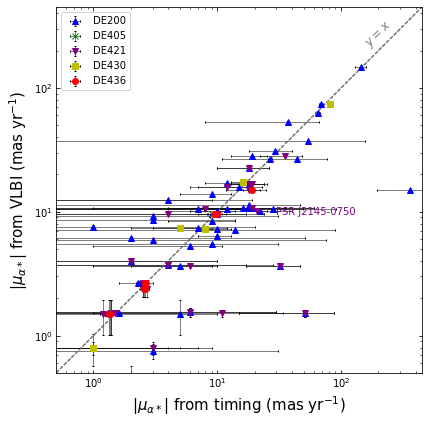

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.errorbar(np.fabs(pm_tab200["pmra_t"]),
            np.fabs(pm_tab200["pmra_v"]),
            xerr=pm_tab200["pmra_err_t"],
            yerr=pm_tab200["pmra_err_v"],
            fmt="b^",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE200")

ax.errorbar(np.fabs(pm_tab405["pmra_t"]),
            np.fabs(pm_tab405["pmra_v"]),
            xerr=pm_tab405["pmra_err_t"],
            yerr=pm_tab405["pmra_err_v"],
            fmt="gx",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE405")

ax.errorbar(np.fabs(pm_tab421["pmra_t"]),
            np.fabs(pm_tab421["pmra_v"]),
            xerr=pm_tab421["pmra_err_t"],
            yerr=pm_tab421["pmra_err_v"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE421")

ax.errorbar(np.fabs(pm_tab430["pmra_t"]),
            np.fabs(pm_tab430["pmra_v"]),
            xerr=pm_tab430["pmra_err_t"],
            yerr=pm_tab430["pmra_err_v"],
            fmt="ys",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE430")

ax.errorbar(np.fabs(pm_tab436["pmra_t"]),
            np.fabs(pm_tab436["pmra_v"]),
            xerr=pm_tab436["pmra_err_t"],
            yerr=pm_tab436["pmra_err_v"],
            fmt="ro",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE436")

x = np.arange(0.01, 2500, 5)
ax.plot(x, x, "k--", lw=1)
ax.plot(x, x, "--", color="tab:grey", lw=1)
ax.text(150, 220, "$y=x$", rotation=45, color="tab:grey", fontsize=12)

ax.text(30, 9.5, "PSR J2145-0750", color="purple")

ax.set_yscale("log")
ax.set_xscale("log")
ax.axis("square")
ax.axis([0.5, 450, 0.5, 450])

ax.set_xlabel(
    "$|\mu_{\\alpha*}|$ from timing (mas yr$^{-1}$)", fontsize=15)
ax.set_ylabel(
    "$|\mu_{\\alpha*}|$ from VLBI (mas yr$^{-1}$)", fontsize=15)


# plt.grid(lw=1)
plt.tight_layout()
plt.legend(loc="upper left")

# plt.savefig("../plots/vlbi_pmra-com.eps")

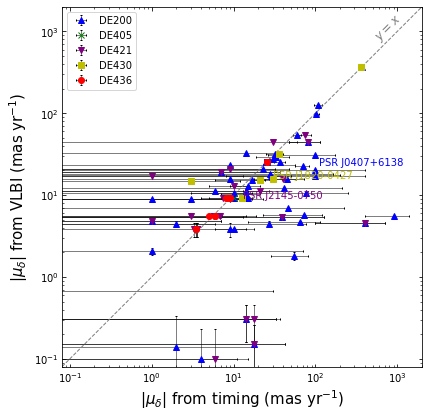

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.errorbar(np.fabs(pm_tab200["pmdec_t"]),
            np.fabs(pm_tab200["pmdec_v"]),
            xerr=pm_tab200["pmdec_err_t"],
            yerr=pm_tab200["pmdec_err_v"],
            fmt="b^",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE200")

ax.errorbar(np.fabs(pm_tab405["pmdec_t"]),
            np.fabs(pm_tab405["pmdec_v"]),
            xerr=pm_tab405["pmdec_err_t"],
            yerr=pm_tab405["pmdec_err_v"],
            fmt="gx",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE405")

ax.errorbar(np.fabs(pm_tab421["pmdec_t"]),
            np.fabs(pm_tab421["pmdec_v"]),
            xerr=pm_tab421["pmdec_err_t"],
            yerr=pm_tab421["pmdec_err_v"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE421")

ax.errorbar(np.fabs(pm_tab430["pmdec_t"]),
            np.fabs(pm_tab430["pmdec_v"]),
            xerr=pm_tab430["pmdec_err_t"],
            yerr=pm_tab430["pmdec_err_v"],
            fmt="ys",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE430")

ax.errorbar(np.fabs(pm_tab436["pmdec_t"]),
            np.fabs(pm_tab436["pmdec_v"]),
            xerr=pm_tab436["pmdec_err_t"],
            yerr=pm_tab436["pmdec_err_v"],
            fmt="ro",
            ecolor="k",
            elinewidth=0.5,
            capsize=1,
            label="DE436")

x = np.arange(0.01, 2500, 5)
ax.plot(x, x, "--", color="tab:grey", lw=1)
ax.text(500, 800, "$y=x$", rotation=45, color="tab:grey", fontsize=12)

ax.text(110, 23, "PSR J0407+6138", color="b")
ax.text(30, 16, "PSR J1820-0427", color="y")
ax.text(13, 9, "PSR J2145-0750", color="purple")

ax.set_yscale("log")
ax.set_xscale("log")
ax.axis("square")
ax.axis([0.08, 2000, 0.08, 2000])

ax.set_xlabel("$|\mu_{\delta}|$ from timing (mas yr$^{-1}$)", fontsize=15)
ax.set_ylabel("$|\mu_{\delta}|$ from VLBI (mas yr$^{-1}$)", fontsize=15)

# plt.grid(lw=1)
plt.tight_layout()
plt.legend(loc="upper left")

# plt.savefig("../plots/vlbi_pmdec-com.eps")

## 2.2 Distribution of normalized PM differences

<Figure size 432x288 with 0 Axes>

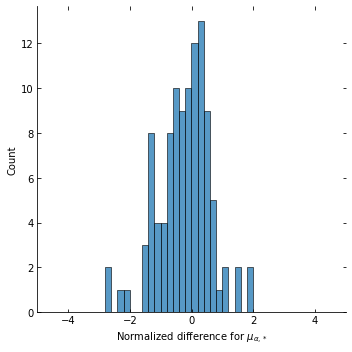

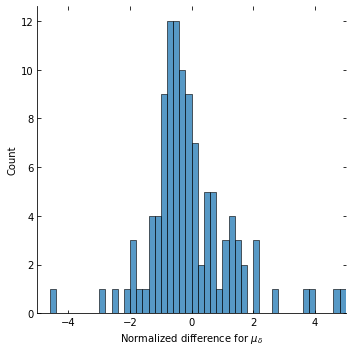

In [15]:
plt.clf()
sns.displot(
    X_pmra,
    binwidth=0.2, height=5, facet_kws=dict(margin_titles=True),
)
plt.xlim([-5, 5])
plt.xlabel("Normalized difference for $\mu_{\\alpha,*}$")
plt.tight_layout()

sns.displot(
    X_pmdec,
    binwidth=0.2, height=5, facet_kws=dict(margin_titles=True),
)
plt.xlim([-5, 5])
plt.xlabel("Normalized difference for $\mu_{\delta}$")
plt.tight_layout()

In [16]:
print("N      RA     DEC")
print("sigma  %      %")
for i in range(1, 11):
    per_ra = count_sigma(X_pmra, i)
    per_dec = count_sigma(X_pmdec, i)

    print("{:2d}     {:2.0f}     {:2.0f}".format(i, per_ra, per_dec))

N      RA     DEC
sigma  %      %
 1     74     66
 2     94     89
 3     97     95
 4     97     97
 5     97     100
 6     99     100
 7     99     100
 8     100     100
 9     100     100
10     100     100


In [17]:
print("Delta pmra < -300 mas/yr")

mask = dpmra < -300
pm_tab[mask]["psr_name", "eph", "pmra_t", "pmra_err_t",
             "pmra_v", "pmra_err_v", "dpmra", "X_pmra", "ref"]

Delta pmra < -300 mas/yr


psr_name,eph,pmra_t,pmra_err_t,pmra_v,pmra_err_v,dpmra,X_pmra,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1022+1001,DE200,-361.0,167.0,-14.89,0.05,-346.11,-2.0725148771686497,hlk+04


In [18]:
print("Delta pmdec < -800 mas/yr")

mask = dpmdec < -300
pm_tab[mask]["psr_name", "eph", "pmdec_t", "pmdec_err_t",
             "pmdec_v", "pmdec_err_v", "dpmdec", "X_pmdec", "ref"]

Delta pmdec < -800 mas/yr


psr_name,eph,pmdec_t,pmdec_err_t,pmdec_v,pmdec_err_v,dpmdec,X_pmdec,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1022+1001,DE200,-900.0,500.0,5.59,0.03,-905.59,-1.811179996739876,hlk+04


In [19]:
print("Delta pmdec > 300 mas/yr")

mask = dpmdec > 300
pm_tab[mask]["psr_name", "eph", "pmdec_t", "pmdec_err_t",
             "pmdec_v", "pmdec_err_v", "dpmdec", "X_pmdec", "ref"]

Delta pmdec > 300 mas/yr


psr_name,eph,pmdec_t,pmdec_err_t,pmdec_v,pmdec_err_v,dpmdec,X_pmdec,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0629+2415,DE200,400.0,300.0,-4.61,0.15,404.61,1.3486998314125316,hlk+04
J0629+2415,DE421,400.0,300.0,-4.61,0.15,404.61,1.3486998314125316,lys+20


In [20]:
pm_tab[pm_tab["psr_name"] == "J1022+1001"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1022+1001,DE200,-14.89,0.05,-361.0,167.0,-346.11,-2.0725148771686497,hlk+04
J1022+1001,DE421,-14.89,0.05,-18.2,6.4,-3.3099999999999987,-0.5171717174125291,dcl+16
J1022+1001,DE436,-14.89,0.05,-19.0,3.0,-4.109999999999999,-1.3698097618542517,rsc+21


In [21]:
pm_tab[pm_tab["psr_name"] == "J1022+1001"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1022+1001,DE200,5.59,0.03,-900.0,500.0,-905.59,-1.811179996739876,hlk+04
J1022+1001,DE421,5.59,0.03,-3.0,16.0,-8.59,-0.5368740562769024,dcl+16
J1022+1001,DE436,5.59,0.03,-5.0,9.0,-10.59,-1.1766601296841044,rsc+21


In [22]:
pm_tab[pm_tab["psr_name"] == "J0629+2415"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0629+2415,DE200,3.63,0.19,32.0,15.0,28.37,1.8911816246257407,hlk+04
J0629+2415,DE421,3.63,0.19,32.0,15.0,28.37,1.8911816246257407,lys+20


In [23]:
pm_tab[pm_tab["psr_name"] == "J0629+2415"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0629+2415,DE200,-4.61,0.15,400.0,300.0,404.61,1.3486998314125316,hlk+04
J0629+2415,DE421,-4.61,0.15,400.0,300.0,404.61,1.3486998314125316,lys+20


In [24]:
print("X_ra >= 3")

mask = np.fabs(X_pmra) >= 3
pm_tab[mask]["psr_name",
             "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

X_ra >= 3


psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1537+1155,DE200,1.51,0.02,1.32,0.03,-0.18999999999999995,-5.269651864139676,stt+02
J1537+1155,DE200,1.51,0.02,1.34,0.01,-0.16999999999999993,-7.602631123499282,kwh03
J2145-0750,DE421,-9.51,0.04,-10.1,0.1,-0.5899999999999999,-5.478012476223028,mnf+16


In [25]:
pm_tab[pm_tab["psr_name"] == "J2145-0750"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2145-0750,DE405,-9.51,0.04,-9.66,0.15,-0.15000000000000036,-0.9662349396012486,vbc+09
J2145-0750,DE430,-9.51,0.04,-9.4,0.3,0.10999999999999943,0.3634502302502975,jbs+19
J2145-0750,DE421,-9.51,0.04,-9.58,0.04,-0.07000000000000028,-1.2374368670764633,dcl+16
J2145-0750,DE200,-9.51,0.04,-10.0,1.7,-0.4900000000000002,-0.2881555389157558,hlk+04
J2145-0750,DE421,-9.51,0.04,-9.559,0.041103,-0.04899999999999949,-0.8543464103348531,vlh+16
J2145-0750,DE436,-9.51,0.04,-9.48,0.02,0.02999999999999936,0.6708203932499226,rsc+21
J2145-0750,DE421,-9.51,0.04,-9.586,0.078031,-0.07600000000000051,-0.8667288770342572,rhc+16
J2145-0750,DE421,-9.51,0.04,-10.1,0.1,-0.5899999999999999,-5.478012476223028,mnf+16


In [26]:
print("3 > X_ra >= 2")

mask = (np.fabs(X_pmra) >= 2) & (np.fabs(X_pmra) < 3)
pm_tab[mask]["psr_name", "eph", "pmra_t", "pmra_err_t",
             "pmra_v", "pmra_err_v", "dpmra", "X_pmra", "ref"]

3 > X_ra >= 2


psr_name,eph,pmra_t,pmra_err_t,pmra_v,pmra_err_v,dpmra,X_pmra,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1022+1001,DE200,-361.0,167.0,-14.89,0.05,-346.11,-2.0725148771686497,hlk+04
J1136+1551,DE430,-82.0,3.0,-73.78,0.03,-8.219999999999999,-2.7398630102741435,jbs+19
J1937+2544,DE421,-21.0,4.0,-10.05,0.04,-10.95,-2.73736313526477,dym+20
J2145-0750,DE436,-10.0,0.2,-9.51,0.04,-0.4900000000000002,-2.4024226554427552,abb+18


In [27]:
pm_tab[pm_tab["psr_name"] == "J1136+1551"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1136+1551,DE200,-73.78,0.03,-69.0,3.0,4.780000000000001,1.593253672641169,hlk+04
J1136+1551,DE430,-73.78,0.03,-82.0,3.0,-8.219999999999999,-2.7398630102741435,jbs+19


In [28]:
pm_tab[pm_tab["psr_name"] == "J1937+2544"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1937+2544,DE200,-10.05,0.04,-10.0,4.0,0.05000000000000071,0.012499375046871273,hlk+04
J1937+2544,DE421,-10.05,0.04,-21.0,4.0,-10.95,-2.73736313526477,dym+20


In [29]:
print("2 > X_ra >= 1")

mask = (np.fabs(X_pmra) >= 1) & (np.fabs(X_pmra) < 2)
pm_tab[mask]["psr_name", "eph", "pmra_t", "pmra_err_t",
             "pmra_v", "pmra_err_v", "dpmra", "X_pmra", "ref"]

2 > X_ra >= 1


psr_name,eph,pmra_t,pmra_err_t,pmra_v,pmra_err_v,dpmra,X_pmra,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0040+5716,DE200,-4.0,15.0,12.4,0.06,-16.4,-1.093324586771625,hlk+04
J0147+5922,DE200,-10.0,3.0,-6.38,0.1,-3.62,-1.205996854421513,hlk+04
J0157+6212,DE421,-51.0,36.0,1.52,0.1,-52.52,-1.4588832604921054,lys+20
J0157+6212,DE200,-51.0,36.0,1.52,0.1,-52.52,-1.4588832604921054,hlk+04
J0332+5434,DE200,12.0,4.0,16.97,0.03,-4.969999999999999,-1.242465056161686,hlk+04
...,...,...,...,...,...,...,...,...
J2113+2754,DE200,-19.0,6.0,-27.98,0.05,8.98,1.496614701780563,hlk+04
J2113+4644,DE421,-4.0,13.0,9.53,0.15,-13.53,-1.040699955710991,lwy+16


In [30]:
pm_tab[pm_tab["psr_name"] == "J0040+5716"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0040+5716,DE200,12.4,0.06,-4.0,15.0,-16.4,-1.093324586771625,hlk+04


In [31]:
pm_tab[pm_tab["psr_name"] == "J0147+5922"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0147+5922,DE200,-6.38,0.1,-10.0,3.0,-3.62,-1.205996854421513,hlk+04


In [32]:
pm_tab[pm_tab["psr_name"] == "J0157+6212"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0157+6212,DE421,1.52,0.1,-51.0,36.0,-52.52,-1.4588832604921054,lys+20
J0157+6212,DE421,1.52,0.1,-11.0,23.0,-12.52,-0.5443426810953818,dym+20
J0157+6212,DE200,1.52,0.1,-51.0,36.0,-52.52,-1.4588832604921054,hlk+04


In [33]:
pm_tab[pm_tab["psr_name"] == "J0406+6138"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0406+6138,DE200,12.4,0.15,0.0,9.0,-12.4,-1.3775864596101155,hlk+04


In [34]:
pm_tab[pm_tab["psr_name"] == "J0406+6138"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0406+6138,DE200,12.4,0.15,0.0,9.0,-12.4,-1.3775864596101155,hlk+04


In [35]:
pm_tab[pm_tab["psr_name"] == "J0629+2415"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0629+2415,DE200,3.63,0.19,32.0,15.0,28.37,1.8911816246257407,hlk+04
J0629+2415,DE421,3.63,0.19,32.0,15.0,28.37,1.8911816246257407,lys+20


In [36]:
pm_tab[pm_tab["psr_name"] == "J2113+2754"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2113+2754,DE200,-27.98,0.05,-19.0,6.0,8.98,1.496614701780563,hlk+04
J2113+2754,DE421,-27.98,0.05,-35.0,13.0,-7.02,-0.5399960059614722,dym+20


In [37]:
pm_tab[pm_tab["psr_name"] == "J2113+4644"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2113+4644,DE200,9.53,0.15,9.0,15.0,-0.5299999999999994,-0.035331566799155584,hlk+04
J2113+4644,DE421,9.53,0.15,-4.0,13.0,-13.53,-1.040699955710991,lwy+16


In [38]:
pm_tab[pm_tab["psr_name"] == "J2317+2149"]["psr_name",
                                           "eph", "pmra_v", "pmra_err_v", "pmra_t", "pmra_err_t", "dpmra", "X_pmra", "ref"]

psr_name,eph,pmra_v,pmra_err_v,pmra_t,pmra_err_t,dpmra,X_pmra,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2317+2149,DE200,8.52,0.1,-3.0,11.0,-11.52,-1.0472294542223906,hlk+04


In [39]:
print("X_dec >= 3")

mask = np.fabs(X_pmdec) >= 3
pm_tab[mask]["psr_name", "eph", "pmdec_t",
             "pmdec_err_t", "pmdec_v", "pmdec_err_v", "dpmdec", "X_pmdec", "ref"]

X_dec >= 3


psr_name,eph,pmdec_t,pmdec_err_t,pmdec_v,pmdec_err_v,dpmdec,X_pmdec,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0406+6138,DE200,70.0,13.0,22.72,0.1,47.28,3.636815480423581,hlk+04
J1537+1155,DE200,-25.05,0.02,-25.31,0.05,0.259999999999998,4.828078792603311,kwh03
J1820-0427,DE430,30.0,3.0,15.88,0.09,14.12,4.704550095245272,jbs+19
J2145-0750,DE430,-12.8,0.8,-9.1,0.09,-3.700000000000001,-4.596007337234459,jbs+19
J2145-0750,DE421,-7.5,0.4,-9.1,0.09,1.5999999999999996,3.902439024390243,mnf+16


In [40]:
pm_tab[pm_tab["psr_name"] == "J0406+6138"]["psr_name", "eph", "pmdec_t",
                                           "pmdec_err_t", "pmdec_v", "pmdec_err_v", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_t,pmdec_err_t,pmdec_v,pmdec_err_v,dpmdec,X_pmdec,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0406+6138,DE200,70.0,13.0,22.72,0.1,47.28,3.636815480423581,hlk+04


In [41]:
pm_tab[pm_tab["psr_name"] == "J0406+6138"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0406+6138,DE200,22.72,0.1,70.0,13.0,47.28,3.636815480423581,hlk+04


In [42]:
print("3 > X_dec >= 2")

mask = (np.fabs(X_pmdec) >= 2) & (np.fabs(X_pmdec) < 3)
pm_tab[mask]["psr_name", "eph", "pmdec_t",
             "pmdec_err_t", "pmdec_v", "pmdec_err_v", "dpmdec", "X_pmdec", "ref"]

3 > X_dec >= 2


psr_name,eph,pmdec_t,pmdec_err_t,pmdec_v,pmdec_err_v,dpmdec,X_pmdec,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0102+6537,DE200,55.0,26.0,1.83,0.21,53.17,2.0449332987516744,hlk+04
J1537+1155,DE200,-25.12,0.05,-25.31,0.05,0.18999999999999773,2.6870057685088478,stt+02
J1833-0338,DE430,-3.0,9.0,15.04,0.34,-18.04,-2.003015641649274,jbs+19
J2010-1323,DE421,-6.9,0.4,-5.61,0.3,-1.29,-2.58,mnf+16
J2145-0750,DE436,-8.872,0.069265,-9.1,0.09,0.22799999999999976,2.007611699312878,pdd+19
J2145-0750,DE200,-15.0,2.0,-9.1,0.09,-5.9,-2.9470176536749118,tsb+99
J2145-0750,DE436,-8.0,0.5,-9.1,0.09,1.0999999999999996,2.165203312742129,abb+18


In [43]:
pm_tab[pm_tab["psr_name"] == "J0102+6537"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0102+6537,DE200,1.83,0.21,55.0,26.0,53.17,2.0449332987516744,hlk+04


In [44]:
pm_tab[pm_tab["psr_name"] == "J1833-0338"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1833-0338,DE430,15.04,0.34,-3.0,9.0,-18.04,-2.003015641649274,jbs+19


In [45]:
pm_tab[pm_tab["psr_name"] == "J2010-1323"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2010-1323,DE421,-5.61,0.3,-5.798,0.470333,-0.18799999999999972,-0.33699921784915515,vlh+16
J2010-1323,DE436,-5.61,0.3,-6.0,0.2,-0.3899999999999997,-1.0816653826391958,abb+18
J2010-1323,DE436,-5.61,0.3,-5.862,0.237561,-0.2519999999999998,-0.658533322825922,pdd+19
J2010-1323,DE421,-5.61,0.3,-5.7,0.4,-0.08999999999999986,-0.17999999999999972,dcl+16
J2010-1323,DE421,-5.61,0.3,-6.9,0.4,-1.29,-2.58,mnf+16


In [46]:
pm_tab[pm_tab["psr_name"] == "J2145-0750"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2145-0750,DE405,-9.1,0.09,-8.9,0.4,0.1999999999999993,0.4878048780487787,vbc+09
J2145-0750,DE430,-9.1,0.09,-12.8,0.8,-3.700000000000001,-4.596007337234459,jbs+19
J2145-0750,DE421,-9.1,0.09,-8.86,0.1,0.2400000000000002,1.7839059509932005,dcl+16
J2145-0750,DE200,-9.1,0.09,-10.0,5.0,-0.9000000000000004,-0.17997084708396743,hlk+04
J2145-0750,DE421,-9.1,0.09,-8.923,0.110009,0.1769999999999996,1.245306620817291,vlh+16
J2145-0750,DE436,-9.1,0.09,-9.11,0.07,-0.009999999999999787,-0.08770580193070104,rsc+21
J2145-0750,DE421,-9.1,0.09,-8.936,0.206479,0.1639999999999997,0.7281085055310742,rhc+16
J2145-0750,DE421,-9.1,0.09,-7.5,0.4,1.5999999999999996,3.902439024390243,mnf+16


In [47]:
print("2 > X_dec >= 1")

mask = (np.fabs(X_pmdec) >= 1) & (np.fabs(X_pmdec) < 2)
pm_tab[mask]["psr_name", "eph", "pmdec_t",
             "pmdec_err_t", "pmdec_v", "pmdec_err_v", "dpmdec", "X_pmdec", "ref"]

2 > X_dec >= 1


psr_name,eph,pmdec_t,pmdec_err_t,pmdec_v,pmdec_err_v,dpmdec,X_pmdec,ref
,,mas / yr,mas / yr,,,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0055+5117,DE421,-1.0,12.0,-17.35,0.2,16.35,1.362310803303955,dym+20
J0147+5922,DE200,10.0,4.0,3.83,0.1,6.17,1.542018194584529,hlk+04
J0152-1637,DE430,-36.0,4.0,-31.37,0.42,-4.629999999999999,-1.1511715617107123,jbs+19
J0157+6212,DE421,81.0,33.0,44.81,0.05,36.19,1.0966654078687115,lys+20
J0157+6212,DE200,81.0,33.0,44.81,0.05,36.19,1.0966654078687115,hlk+04
...,...,...,...,...,...,...,...,...
J2149+6329,DE421,21.0,6.0,11.26,0.28,9.74,1.6215685856024602,dym+20
J2150+5247,DE200,2.0,4.0,-4.43,0.35,6.43,1.6013814008750016,hlk+04


In [48]:
pm_tab[pm_tab["psr_name"] == "J1022+1001"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1022+1001,DE200,5.59,0.03,-900.0,500.0,-905.59,-1.811179996739876,hlk+04
J1022+1001,DE421,5.59,0.03,-3.0,16.0,-8.59,-0.5368740562769024,dcl+16
J1022+1001,DE436,5.59,0.03,-5.0,9.0,-10.59,-1.1766601296841044,rsc+21


In [49]:
pm_tab[pm_tab["psr_name"] == "J0629+2415"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t",  "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0629+2415,DE200,-4.61,0.15,400.0,300.0,404.61,1.3486998314125316,hlk+04
J0629+2415,DE421,-4.61,0.15,400.0,300.0,404.61,1.3486998314125316,lys+20


In [50]:
pm_tab[pm_tab["psr_name"] == "J1912+2104"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1912+2104,DE200,-5.77,0.12,72.0,49.0,77.77,1.5871380977187963,hlk+04


In [51]:
pm_tab[pm_tab["psr_name"] == "J1919+0021"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1919+0021,DE200,-4.71,0.1,-65.0,50.0,-60.29,-1.2057975884072347,hlk+04


In [52]:
pm_tab[pm_tab["psr_name"] == "J0157+6212"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0157+6212,DE421,44.81,0.05,81.0,33.0,36.19,1.0966654078687115,lys+20
J0157+6212,DE421,44.81,0.05,30.0,30.0,-14.810000000000002,-0.493665981019947,dym+20
J0157+6212,DE200,44.81,0.05,81.0,33.0,36.19,1.0966654078687115,hlk+04


In [53]:
pm_tab[pm_tab["psr_name"] == "J2305+3100"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2305+3100,DE421,-15.57,0.16,-40.0,18.0,-24.43,-1.3571686067437223,dym+20
J2305+3100,DE200,-15.57,0.16,-45.0,28.0,-29.43,-1.0510542686418163,hlk+04


In [54]:
pm_tab[pm_tab["psr_name"] == "J0055+5117"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0055+5117,DE200,-17.35,0.2,-29.0,21.0,-11.649999999999999,-0.5547367472032331,hlk+04
J0055+5117,DE421,-17.35,0.2,-1.0,12.0,16.35,1.362310803303955,dym+20


In [55]:
pm_tab[pm_tab["psr_name"] == "J0147+5922"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0147+5922,DE200,3.83,0.1,10.0,4.0,6.17,1.542018194584529,hlk+04


In [56]:
pm_tab[pm_tab["psr_name"] == "J0152-1637"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0152-1637,DE200,-31.37,0.42,-32.0,7.0,-0.629999999999999,-0.08983843609191994,hlk+04
J0152-1637,DE430,-31.37,0.42,-36.0,4.0,-4.629999999999999,-1.1511715617107123,jbs+19


In [57]:
pm_tab[pm_tab["psr_name"] == "J0601-0527"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J0601-0527,DE200,-15.23,0.1,-17.0,11.0,-1.7699999999999996,-0.16090244218521102,hlk+04
J0601-0527,DE430,-15.23,0.1,-21.0,3.0,-5.77,-1.92226570442324,jbs+19


In [58]:
pm_tab[pm_tab["psr_name"] == "J1012+5307"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1012+5307,DE421,-25.4,0.14,-25.482,0.011,-0.08200000000000074,-0.5839146692423021,dcl+16
J1012+5307,DE436,-25.4,0.14,-25.5,0.04,-0.10000000000000142,-0.6868028197434548,abb+18
J1012+5307,DE421,-25.4,0.14,-25.6,0.2,-0.20000000000000284,-0.819231920519052,mnf+16
J1012+5307,DE200,-25.4,0.14,-25.8,0.8,-0.40000000000000213,-0.4925152335778547,hlk+04
J1012+5307,DE405,-25.4,0.14,-25.61,0.02,-0.21000000000000085,-1.4849242404917555,lwj+09
J1012+5307,DE200,-25.4,0.14,-25.2,0.2,0.1999999999999993,0.8192319205190375,lcw+01
J1012+5307,DE436,-25.4,0.14,-25.486,0.013773,-0.08600000000000207,-0.6113344853278828,pdd+19
J1012+5307,DE421,-25.4,0.14,-25.458,0.013951,-0.05799999999999983,-0.4122439540152934,vlh+16


In [59]:
pm_tab[pm_tab["psr_name"] == "J1136+1551"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J1136+1551,DE200,366.57,0.07,372.0,5.0,5.430000000000007,1.0858935876423625,hlk+04
J1136+1551,DE430,366.57,0.07,358.0,5.0,-8.569999999999993,-1.7138320526878503,jbs+19


In [60]:
pm_tab[pm_tab["psr_name"] == "J2113+2754"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2113+2754,DE200,-54.43,0.1,-60.0,7.0,-5.57,-0.795633102804753,hlk+04
J2113+2754,DE421,-54.43,0.1,-74.0,15.0,-19.57,-1.304637675040458,dym+20


In [61]:
pm_tab[pm_tab["psr_name"] == "J2149+6329"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2149+6329,DE421,11.26,0.28,21.0,6.0,9.74,1.6215685856024602,dym+20
J2149+6329,DE200,11.26,0.28,6.0,7.0,-5.26,-0.7508281489823732,hlk+04


In [62]:
pm_tab[pm_tab["psr_name"] == "J2150+5247"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2150+5247,DE200,-4.43,0.35,2.0,4.0,6.43,1.6013814008750016,hlk+04


In [63]:
pm_tab[pm_tab["psr_name"] == "J2225+6535"]["psr_name",
                                           "eph", "pmdec_v", "pmdec_err_v", "pmdec_t", "pmdec_err_t", "dpmdec", "X_pmdec", "ref"]

psr_name,eph,pmdec_v,pmdec_err_v,pmdec_t,pmdec_err_t,dpmdec,X_pmdec,ref
,,,,mas / yr,mas / yr,mas / yr,mas / yr,
str11,bytes5,float64,float64,float64,float64,float64,float64,bytes6
J2225+6535,DE200,126.53,0.12,109.0,13.0,-17.53,-1.348404092883615,hlk+04


## 2.3 PM differences vs. VLBI PM

In [64]:
elw = 0.05

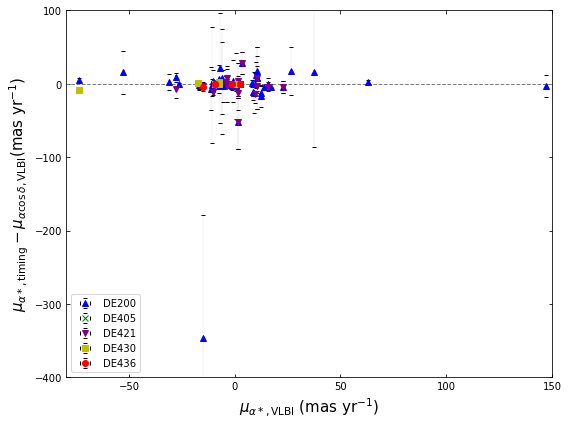

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(pm_tab200["pmra_v"], pm_tab200["dpmra"],
            xerr=pm_tab200["pmra_err_v"],
            yerr=pm_tab200["dpmra_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(pm_tab405["pmra_v"], pm_tab405["dpmra"],
            xerr=pm_tab405["pmra_err_v"],
            yerr=pm_tab405["dpmra_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(pm_tab421["pmra_v"], pm_tab421["dpmra"],
            xerr=pm_tab421["pmra_err_v"],
            yerr=pm_tab421["dpmra_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(pm_tab430["pmra_v"], pm_tab430["dpmra"],
            xerr=pm_tab430["pmra_err_v"],
            yerr=pm_tab430["dpmra_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(pm_tab436["pmra_v"], pm_tab436["dpmra"],
            xerr=pm_tab436["pmra_err_v"],
            yerr=pm_tab436["dpmra_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -100, 250, ls="dashed", color="tab:grey", lw=1)


ax.axis([-80, 150, -400, 100])

ax.set_ylabel("$\mu_{\\alpha*, {\\rm timing}} - \mu_{\\alpha\cos\delta, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$\mu_{\\alpha*, {\\rm VLBI}}$ (mas yr$^{-1}$)",
              fontsize=15)

plt.tight_layout()
plt.legend()

# plt.savefig("../plots/vlbi_pmra-com.eps")

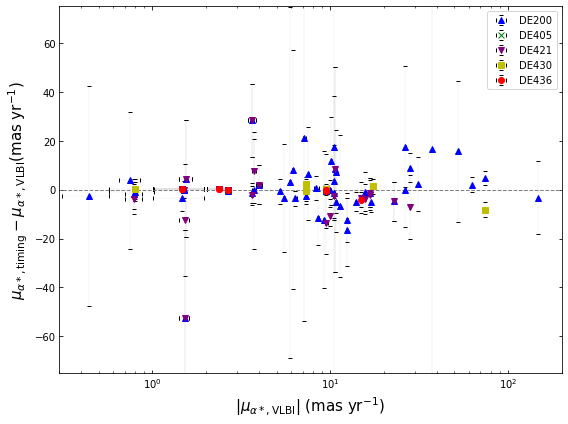

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(np.fabs(pm_tab200["pmra_v"]), pm_tab200["dpmra"],
            xerr=pm_tab200["pmra_err_v"],
            yerr=pm_tab200["dpmra_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(np.fabs(pm_tab405["pmra_v"]), pm_tab405["dpmra"],
            xerr=pm_tab405["pmra_err_v"],
            yerr=pm_tab405["dpmra_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(np.fabs(pm_tab421["pmra_v"]), pm_tab421["dpmra"],
            xerr=pm_tab421["pmra_err_v"],
            yerr=pm_tab421["dpmra_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(np.fabs(pm_tab430["pmra_v"]), pm_tab430["dpmra"],
            xerr=pm_tab430["pmra_err_v"],
            yerr=pm_tab430["dpmra_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(np.fabs(pm_tab436["pmra_v"]), pm_tab436["dpmra"],
            xerr=pm_tab436["pmra_err_v"],
            yerr=pm_tab436["dpmra_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.hlines(-0.59, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.vlines(9.5, -100, 250, ls="dashed", color="tab:grey", lw=1)

ax.axis([0.3, 200, -75, 75])
ax.set_xscale("log")

ax.set_ylabel("$\mu_{\\alpha*, {\\rm timing}} - \mu_{\\alpha*, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$|\mu_{\\alpha*, {\\rm VLBI}}|$ (mas yr$^{-1}$)",
              fontsize=15)


# ax.set_yscale("log")

plt.tight_layout()
plt.legend()

# plt.savefig("../plots/vlbi_pmra-com.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


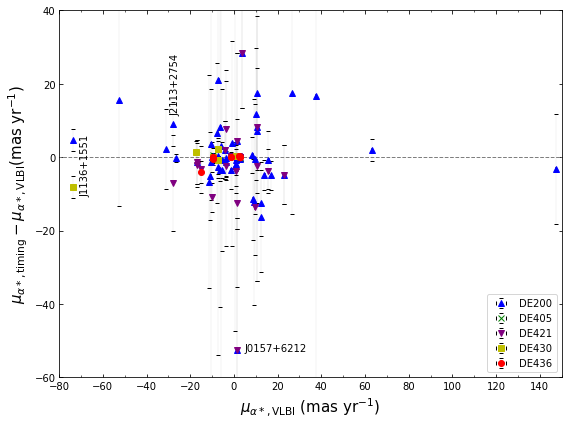

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(pm_tab200["pmra_v"], pm_tab200["dpmra"],
            xerr=pm_tab200["pmra_err_v"],
            yerr=pm_tab200["dpmra_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(pm_tab405["pmra_v"], pm_tab405["dpmra"],
            xerr=pm_tab405["pmra_err_v"],
            yerr=pm_tab405["dpmra_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(pm_tab421["pmra_v"], pm_tab421["dpmra"],
            xerr=pm_tab421["pmra_err_v"],
            yerr=pm_tab421["dpmra_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(pm_tab430["pmra_v"], pm_tab430["dpmra"],
            xerr=pm_tab430["pmra_err_v"],
            yerr=pm_tab430["dpmra_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(pm_tab436["pmra_v"], pm_tab436["dpmra"],
            xerr=pm_tab436["pmra_err_v"],
            yerr=pm_tab436["dpmra_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.hlines(9, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.vlines(-28, -100, 250, ls="dashed", color="tab:grey", lw=1)

ax.text(-70, -10, "J1136+1551", color="k", rotation=90)

ax.text(5, -53, "J0157+6212", color="k")

ax.text(-29, 12, "J2113+2754", color="k", rotation=90)

ax.axis([-80, 150, -60, 40])
ax.xaxis.set_minor_locator(MultipleLocator(10))
# ax.axis([0.3, 200, -75, 75])
# ax.set_xscale("log")

ax.set_ylabel("$\mu_{\\alpha*, {\\rm timing}} - \mu_{\\alpha*, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$\mu_{\\alpha*, {\\rm VLBI}}$ (mas yr$^{-1}$)",
              fontsize=15)
ax.set_xticks(np.arange(-80, 150, 20))

# ax.set_yscale("log")

plt.tight_layout()
plt.legend()

plt.savefig("../plots/vlbi_pmra-com.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


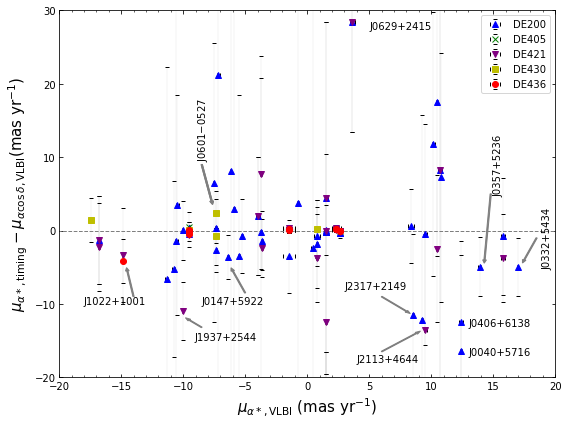

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(pm_tab200["pmra_v"], pm_tab200["dpmra"],
            xerr=pm_tab200["pmra_err_v"],
            yerr=pm_tab200["dpmra_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(pm_tab405["pmra_v"], pm_tab405["dpmra"],
            xerr=pm_tab405["pmra_err_v"],
            yerr=pm_tab405["dpmra_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(pm_tab421["pmra_v"], pm_tab421["dpmra"],
            xerr=pm_tab421["pmra_err_v"],
            yerr=pm_tab421["dpmra_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(pm_tab430["pmra_v"], pm_tab430["dpmra"],
            xerr=pm_tab430["pmra_err_v"],
            yerr=pm_tab430["dpmra_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(pm_tab436["pmra_v"], pm_tab436["dpmra"],
            xerr=pm_tab436["pmra_err_v"],
            yerr=pm_tab436["dpmra_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.hlines(-4, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.vlines(-15, -100, 250, ls="dashed", color="tab:grey", lw=1)

# J2145-0750

ax.text(-9.1, -15, "J1937+2544", color="k")
ax.arrow(-8.5, -13.2, -1, 1, width=0.1, color="tab:grey")

ax.text(13, -17, "J0040+5716", color="k")

ax.text(-8.5, -10, "J0147+5922", color="k")
ax.arrow(-5, -8.5, -1, 3, width=0.1, color="tab:grey")

ax.text(19, -5, "J0332+5434", color="k", rotation=90)
ax.arrow(18.5, -1, -1, -3, width=0.1, color="tab:grey")

ax.text(15, 5, "J0357+5236", color="k", rotation=90)
ax.arrow(14.8, 5, -0.5, -9, width=0.1, color="tab:grey")

ax.text(13, -13, "J0406+6138", color="k")

ax.text(-9, 10, "J0601$-$0527", color="k", rotation=90)
ax.arrow(-8.5, 9, 0.8, -5, width=0.1, color="tab:grey")

ax.text(5, 27.5, "J0629+2415", color="k")
ax.arrow(-8.5, 9, 0.8, -5, width=0.1, color="tab:grey")

# J1012+5307, too crowded

ax.text(-18, -10, "J1022+1001", color="k")
ax.arrow(-14, -9, -0.5, 3.5, width=0.1, color="tab:grey")

# J2010-1323

ax.text(4, -18, "J2113+4644", color="k")
ax.arrow(6, -16.5, 2.8, 2.5, width=0.1, color="tab:grey")

ax.text(3, -8, "J2317+2149", color="k")
ax.arrow(6, -9, 2, -2, width=0.1, color="tab:grey")

ax.axis([-20, 20, -20, 30])
ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.axis([0.3, 200, -75, 75])

ax.set_ylabel("$\mu_{\\alpha*, {\\rm timing}} - \mu_{\\alpha\cos\delta, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$\mu_{\\alpha*, {\\rm VLBI}}$ (mas yr$^{-1}$)",
              fontsize=15)

plt.tight_layout()
plt.legend()

plt.savefig("../plots/vlbi_pmra-com-zoomin.eps")


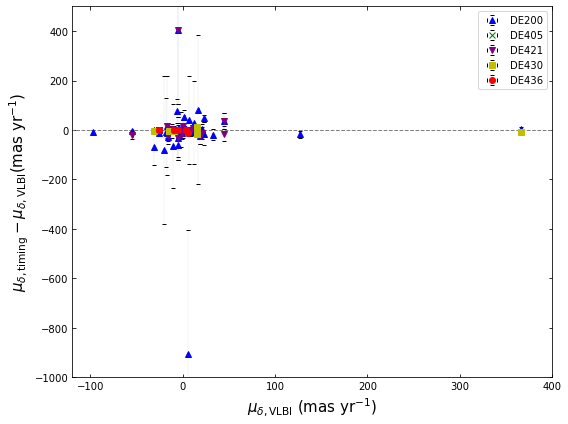

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(pm_tab200["pmdec_v"], pm_tab200["dpmdec"],
            xerr=pm_tab200["pmdec_err_v"],
            yerr=pm_tab200["dpmdec_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(pm_tab405["pmdec_v"], pm_tab405["dpmdec"],
            xerr=pm_tab405["pmdec_err_v"],
            yerr=pm_tab405["dpmdec_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(pm_tab421["pmdec_v"], pm_tab421["dpmdec"],
            xerr=pm_tab421["pmdec_err_v"],
            yerr=pm_tab421["dpmdec_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(pm_tab430["pmdec_v"], pm_tab430["dpmdec"],
            xerr=pm_tab430["pmdec_err_v"],
            yerr=pm_tab430["dpmdec_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(pm_tab436["pmdec_v"], pm_tab436["dpmdec"],
            xerr=pm_tab436["pmdec_err_v"],
            yerr=pm_tab436["dpmdec_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -150, 400, ls="dashed", color="tab:grey", lw=1)

ax.axis([-120, 400, -1000, 500])

ax.set_ylabel("$\mu_{\delta, {\\rm timing}} - \mu_{\delta, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$\mu_{\delta, {\\rm VLBI}}$ (mas yr$^{-1}$)",
              fontsize=15)

plt.tight_layout()
plt.legend()

# plt.savefig("../plots/vlbi_pmdec-com.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


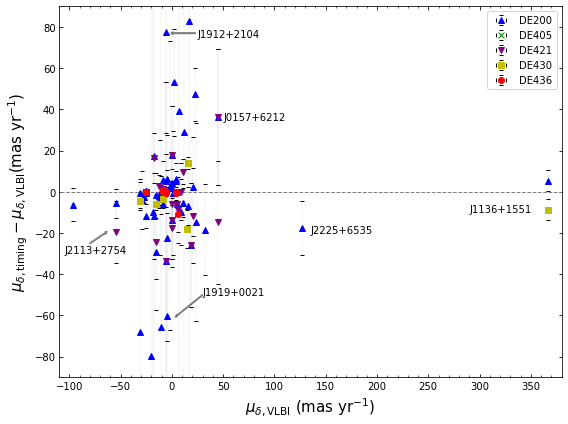

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(pm_tab200["pmdec_v"], pm_tab200["dpmdec"],
            xerr=pm_tab200["pmdec_err_v"],
            yerr=pm_tab200["dpmdec_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(pm_tab405["pmdec_v"], pm_tab405["dpmdec"],
            xerr=pm_tab405["pmdec_err_v"],
            yerr=pm_tab405["dpmdec_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(pm_tab421["pmdec_v"], pm_tab421["dpmdec"],
            xerr=pm_tab421["pmdec_err_v"],
            yerr=pm_tab421["dpmdec_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(pm_tab430["pmdec_v"], pm_tab430["dpmdec"],
            xerr=pm_tab430["pmdec_err_v"],
            yerr=pm_tab430["dpmdec_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(pm_tab436["pmdec_v"], pm_tab436["dpmdec"],
            xerr=pm_tab436["pmdec_err_v"],
            yerr=pm_tab436["dpmdec_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -150, 400, ls="dashed", color="tab:grey", lw=1)
# ax.hlines(36, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.vlines(45, -100, 250, ls="dashed", color="tab:grey", lw=1)

ax.text(25, 75, "J1912+2104", color="k")
ax.arrow(23, 77, -22, 0, width=0.5, color="tab:grey")

ax.text(30, -50, "J1919+0021", color="k")
ax.arrow(30, -50, -25, -10, width=0.5, color="tab:grey")

ax.text(50, 35, "J0157+6212", color="k")

ax.text(290, -10, "J1136+1551", color="k")

ax.text(-105, -30, "J2113+2754", color="k")
ax.arrow(-80, -25, 15, 5, width=0.5, color="tab:grey")

ax.text(135, -20, "J2225+6535", color="k")

ax.axis([-110, 380, -90, 90])
ax.set_xticks(np.arange(-100, 400, 50))
ax.xaxis.set_minor_locator(MultipleLocator(10))

ax.set_ylabel("$\mu_{\delta, {\\rm timing}} - \mu_{\delta, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$\mu_{\delta, {\\rm VLBI}}$ (mas yr$^{-1}$)",
              fontsize=15)

plt.tight_layout()
plt.legend()

plt.savefig("../plots/vlbi_pmdec-com.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


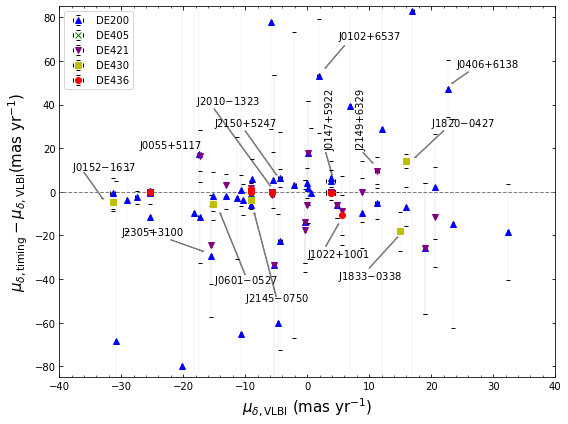

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(pm_tab200["pmdec_v"], pm_tab200["dpmdec"],
            xerr=pm_tab200["pmdec_err_v"],
            yerr=pm_tab200["dpmdec_err"],
            fmt="b^",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE200")

ax.errorbar(pm_tab405["pmdec_v"], pm_tab405["dpmdec"],
            xerr=pm_tab405["pmdec_err_v"],
            yerr=pm_tab405["dpmdec_err"],
            fmt="gx",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE405")

ax.errorbar(pm_tab421["pmdec_v"], pm_tab421["dpmdec"],
            xerr=pm_tab421["pmdec_err_v"],
            yerr=pm_tab421["dpmdec_err"],
            fmt="v",
            color="purple",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE421")

ax.errorbar(pm_tab430["pmdec_v"], pm_tab430["dpmdec"],
            xerr=pm_tab430["pmdec_err_v"],
            yerr=pm_tab430["dpmdec_err"],
            fmt="ys",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE430")

ax.errorbar(pm_tab436["pmdec_v"], pm_tab436["dpmdec"],
            xerr=pm_tab436["pmdec_err_v"],
            yerr=pm_tab436["dpmdec_err"],
            fmt="ro",
            ecolor="k",
            elinewidth=elw,
            capsize=2,
            label="DE436")

ax.hlines(0, -150, 400, ls="dashed", color="tab:grey", lw=1)
# ax.hlines(14, -100, 250, ls="dashed", color="tab:grey", lw=1)
# ax.vlines(16, -100, 250, ls="dashed", color="tab:grey", lw=1)

ax.text(24, 57, "J0406+6138", color="k")
ax.arrow(26, 55, -2.5, -5, width=0.1, color="tab:grey")

ax.text(20, 30, "J1820$-$0427", color="k")
ax.arrow(22, 28, -4.5, -12, width=0.1, color="tab:grey")

ax.text(5, 70, "J0102+6537", color="k")
ax.arrow(6, 67, -3, -10, width=0.1, color="tab:grey")

ax.text(5, -40, "J1833$-$0338", color="k")
ax.arrow(10, -35, 4.5, 14, width=0.1, color="tab:grey")

ax.text(-18, 40, "J2010$-$1323", color="k")
ax.arrow(-15, 38, 9, -35, width=0.1, color="tab:grey")

ax.text(-10, -50, "J2145$-$0750", color="k")
ax.arrow(-5, -48, -3.5, 38, width=0.1, color="tab:grey")

ax.text(0, -30, "J1022+1001", color="k")
ax.arrow(3, -25, 2, 10, width=0.1, color="tab:grey")

# J0629+2415

ax.text(-30, -20, "J2305+3100", color="k")
ax.arrow(-22, -22, 5, -5, width=0.1, color="tab:grey")

ax.text(-27, 20, "J0055+5117", color="k")

ax.text(3, 20, "J0147+5922", color="k", rotation=90)
ax.arrow(3, 18, 1, -10, width=0.1, color="tab:grey")

ax.text(-38, 10, "J0152$-$1637", color="k")
ax.arrow(-36, 9, 3, -12, width=0.1, color="tab:grey")

ax.text(-15, -42, "J0601$-$0527", color="k")
ax.arrow(-10, -38, -4, 28, width=0.1, color="tab:grey")

ax.text(8, 20, "J2149+6329", color="k", rotation=90)
ax.arrow(9, 18, 1.5, -4.5, width=0.1, color="tab:grey")

ax.text(-15, 30, "J2150+5247", color="k")
ax.arrow(-10, 28, 5, -20, width=0.1, color="tab:grey")

ax.axis([-40, 40, -85, 85])
ax.xaxis.set_minor_locator(MultipleLocator(2))

ax.set_ylabel("$\mu_{\delta, {\\rm timing}} - \mu_{\delta, {\\rm VLBI}}$(mas yr$^{-1}$)",
              fontsize=15)
ax.set_xlabel("$\mu_{\delta, {\\rm VLBI}}$ (mas yr$^{-1}$)",
              fontsize=15)

plt.tight_layout()
plt.legend()

plt.savefig("../plots/vlbi_pmdec-com-zoomin.eps")


In [72]:
for i in range(len(pm_tab)):
    
    if pm_tab[i]["pmra_err_t"] < pm_tab[i]["pmra_err_v"]:
        print("PMRA")
        print(pm_tab["psr_name"][i], pm_tab["pmra_t"][i], pm_tab["pmra_err_t"][i], pm_tab["pmra_v"][i], pm_tab["pmra_err_v"][i]) 
    
    if pm_tab[i]["pmdec_err_t"] < pm_tab[i]["pmdec_err_v"]:
        print("PMDEC")
        print(pm_tab["psr_name"][i], pm_tab["pmdec_t"][i], pm_tab["pmdec_err_t"][i], pm_tab["pmdec_v"][i], pm_tab["pmdec_err_v"][i]) 
    

PMRA
J1012+5307 2.609 0.008 2.67 0.09
PMDEC
J1012+5307 -25.482 0.011 -25.4 0.14
PMRA
J1012+5307 2.66 0.03 2.67 0.09
PMDEC
J1012+5307 -25.5 0.04 -25.4 0.14
PMRA
J1012+5307 2.562 0.014 2.67 0.09
PMDEC
J1012+5307 -25.61 0.02 -25.4 0.14
PMRA
J1012+5307 2.614 0.010224 2.67 0.09
PMDEC
J1012+5307 -25.486 0.013773 -25.4 0.14
PMRA
J1012+5307 2.627 0.010222 2.67 0.09
PMDEC
J1012+5307 -25.458 0.013951 -25.4 0.14
PMRA
J1537+1155 1.482 0.007 1.51 0.02
PMDEC
J1537+1155 -25.285 0.012 -25.31 0.05
PMRA
J1537+1155 1.34 0.01 1.51 0.02
PMDEC
J1537+1155 -25.05 0.02 -25.31 0.05
PMRA
J2010-1323 2.499 0.114483 2.36 0.33
PMRA
J2010-1323 2.59 0.05 2.36 0.33
PMDEC
J2010-1323 -6.0 0.2 -5.61 0.3
PMRA
J2010-1323 2.557 0.056236 2.36 0.33
PMDEC
J2010-1323 -5.862 0.237561 -5.61 0.3
PMRA
J2010-1323 2.53 0.09 2.36 0.33
PMRA
J2010-1323 2.71 0.09 2.36 0.33
PMRA
J2145-0750 -9.48 0.02 -9.51 0.04
PMDEC
J2145-0750 -9.11 0.07 -9.1 0.09
PMRA
J2145-0750 -9.583 0.025382 -9.51 0.04
PMDEC
J2145-0750 -8.872 0.069265 -9.1 0.09
PMRA
J